## **Dataset Generation**

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.data.data_generation_utils import *

### **Labels**

In [2]:
labels_df = pd.read_csv('../datasets/labels.csv')
labels_df.head()

,observation_date,JHDUSRGDPBR
0,1967-10-01,0
1,1968-01-01,0
2,1968-04-01,0
3,1968-07-01,0
4,1968-10-01,0


In [3]:
labels_df = labels_df.rename(columns={'JHDUSRGDPBR': 'label'})
print("Label possible values", labels_df['label'].unique())

Label possible values [0 1]


In [4]:
labels_df = convert_date_to_datetime(labels_df, 'observation_date')
labels_df.head()

,label
date,
1967-10-01,0
1968-01-01,0
1968-04-01,0
1968-07-01,0
1968-10-01,0


In [5]:
_, target_frequency = verify_ts_time_frequency(labels_df, 'Labels')
print("Label time frequency: ", target_frequency)

Label time frequency:  QS-OCT


### **Macroeconomic Indicators Data**

In [6]:
macroeconomic_indicators = ['GDP', 'UNRATE', 'CPIAUCSL', 'INDPRO']

#### 1. **Gross Domestic Product**

In [7]:
gdp_df = pd.read_csv('../datasets/GDP.csv')
gdp_df.head()

,observation_date,GDP
0,1965-01-01,717.790
1,1965-04-01,730.191
2,1965-07-01,749.323
3,1965-10-01,771.857
4,1966-01-01,795.734


In [8]:
df_info(gdp_df)

,dtype,missing,n_unique,mean,std,min,max
observation_date,object,0,243,NaN,NaN,NaN,NaN
GDP,float64,0,243,9818.398753,8018.775733,717.79,31095.089


In [9]:
gdp_ts = convert_date_to_datetime(gdp_df, 'observation_date')
# print("Date Column type: ", (gdp_ts['date'].dtype))
gdp_ts.head()

,GDP
date,
1965-01-01,717.790
1965-04-01,730.191
1965-07-01,749.323
1965-10-01,771.857
1966-01-01,795.734


In [10]:
name, frequency = verify_ts_time_frequency(gdp_ts, 'GDP')
print(name,": ",frequency)

GDP :  QS-OCT


In [11]:
gdp_ts = aggregate_trimesters(ts_df=gdp_ts, ts_df_name='GDP', time_series_freq=frequency, target_frequency='QS-OCT', aggregate_method='mean')

GDP Time Series is already in the target frequency (QS-OCT)


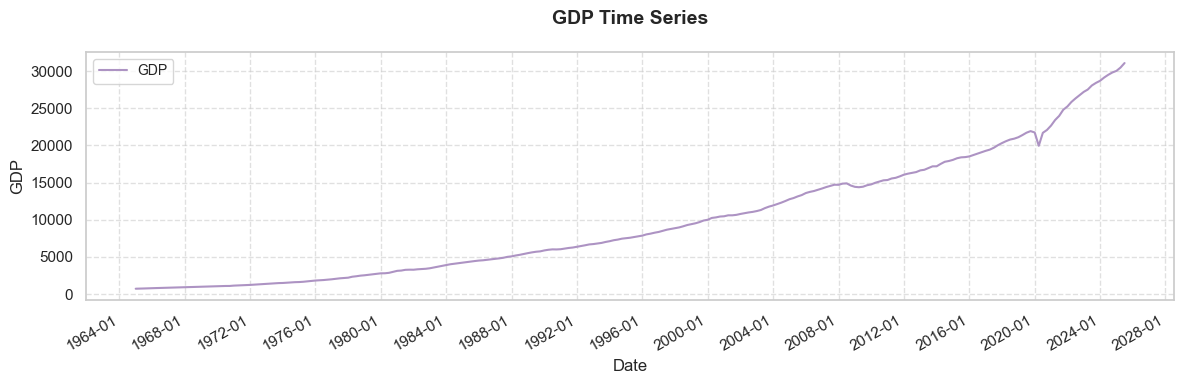

In [12]:
plot_time_series(gdp_ts, 'GDP')

In [13]:
results_gdp = run_adf_test(gdp_ts, 'GDP')
results_gdp

(  Feature  ADF Statistic  p-value  Stationary
 0     GDP       7.509768      1.0       False,
 False)

In [14]:
gdp_ts_diff, diff_col_name = difference_ts(gdp_ts, column_name='GDP')
gdp_ts_diff.head()

,GDP,GDP_diff
date,,
1965-01-01,717.790,NaN
1965-04-01,730.191,12.401
1965-07-01,749.323,19.132
1965-10-01,771.857,22.534
1966-01-01,795.734,23.877


In [15]:
results_gdp = run_adf_test(gdp_ts_diff, 'GDP_diff')
results_gdp

(    Feature  ADF Statistic   p-value  Stationary
 0  GDP_diff      -3.507812  0.007789        True,
 True)

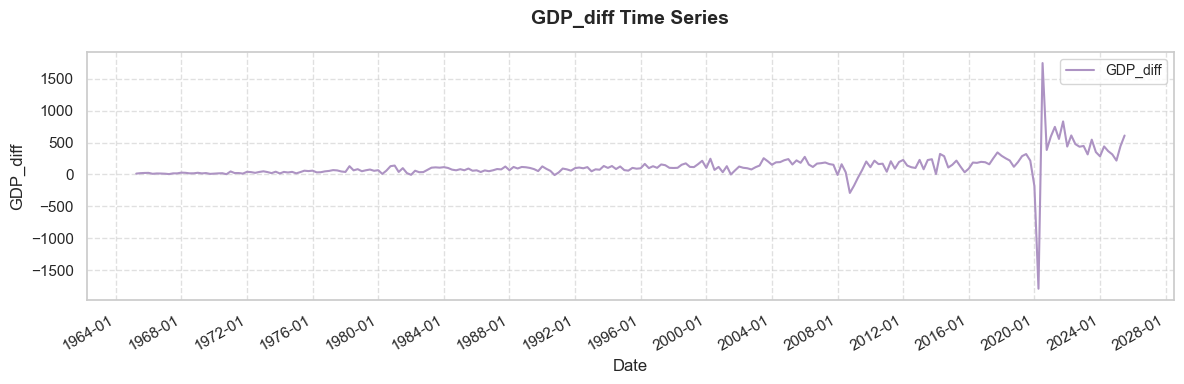

In [16]:
plot_time_series(gdp_ts_diff, 'GDP_diff')

In [17]:
final_gdp = gdp_ts_diff
final_gdp.head()

,GDP,GDP_diff
date,,
1965-01-01,717.790,NaN
1965-04-01,730.191,12.401
1965-07-01,749.323,19.132
1965-10-01,771.857,22.534
1966-01-01,795.734,23.877


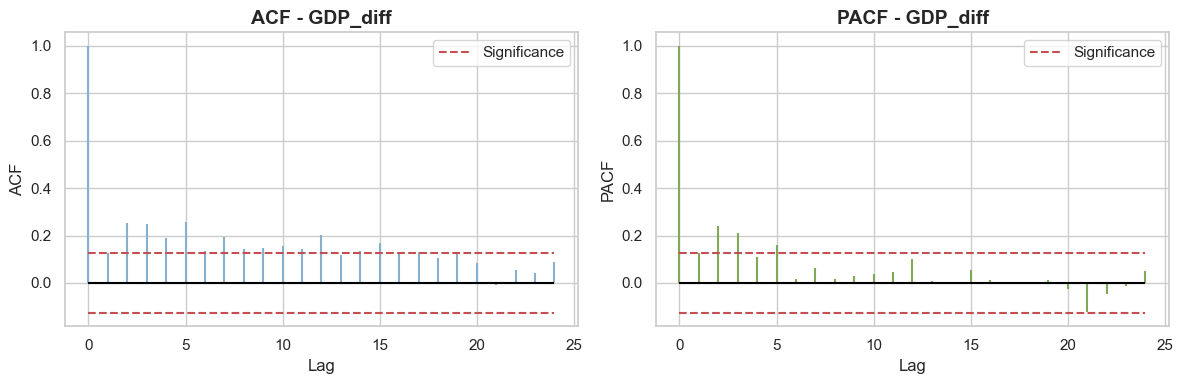

In [18]:
plot_correlations(final_gdp, 'GDP_diff', lags=24)

#### 2. **Unemployment Rate**

In [19]:
unrate_df = pd.read_csv('../datasets/UNRATE.csv')
unrate_df.head()

,observation_date,UNRATE
0,1965-01-01,4.9
1,1965-02-01,5.1
2,1965-03-01,4.7
3,1965-04-01,4.8
4,1965-05-01,4.6


Dataset Information:
                     dtype  missing  n_unique      mean       std  min   max
observation_date   object        0       731       NaN       NaN  NaN   NaN
UNRATE            float64        1        74  5.878904  1.756069  3.4  14.8
Time Series Dataset:
             UNRATE
date              
1965-01-01     4.9
1965-02-01     5.1
1965-03-01     4.7
1965-04-01     4.8
1965-05-01     4.6
UNRATE Time Series frequency changed from MS to QS-OCT
Aggregated dataset:
               UNRATE
date                
1965-01-01  4.900000
1965-04-01  4.666667
1965-07-01  4.366667
1965-10-01  4.100000
1966-01-01  3.866667



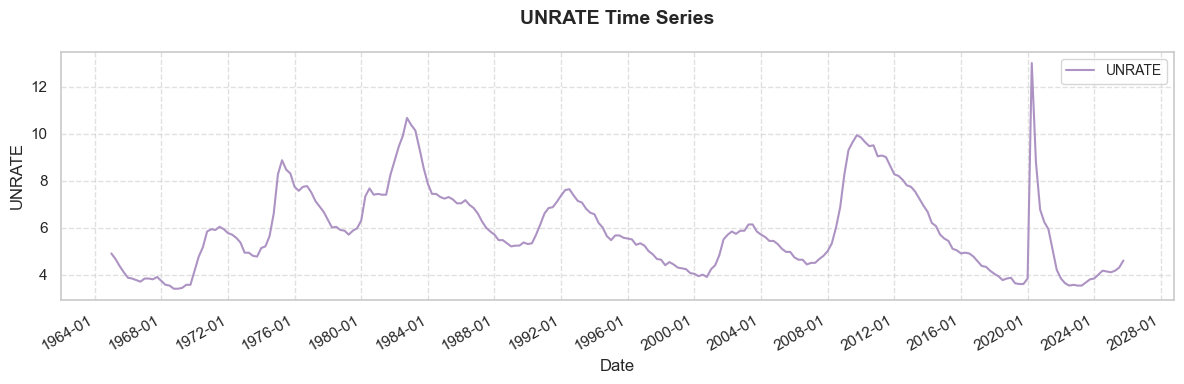

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0  UNRATE      -3.322044  0.013921        True


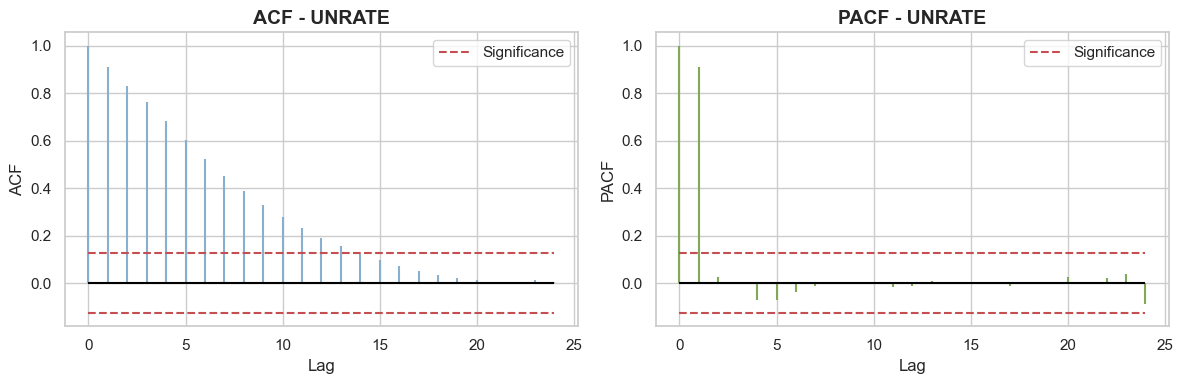

In [20]:
final_unrate = time_series_analysis_main(unrate_df, date_column_name='observation_date', column_name='UNRATE', lags=24)

#### 3. **Consumer Price Index for All Urban Consumers**

In [21]:
cpi_df = pd.read_csv('../datasets/CPIAUCSL.csv')
cpi_df.head()

,observation_date,CPIAUCSL
0,1965-01-01,31.28
1,1965-02-01,31.28
2,1965-03-01,31.31
3,1965-04-01,31.38
4,1965-05-01,31.48


In [22]:
cpi_df = cpi_df.rename(columns={'CPIAUCSL': 'CPI'})

Dataset Information:
                     dtype  missing  n_unique        mean        std    min  \
observation_date   object        0       731         NaN        NaN    NaN   
CPI               float64        1       699  152.129889  81.910459  31.28   

                      max  
observation_date      NaN  
CPI               325.031  
Time Series Dataset:
               CPI
date             
1965-01-01  31.28
1965-02-01  31.28
1965-03-01  31.31
1965-04-01  31.38
1965-05-01  31.48
CPI Time Series frequency changed from MS to QS-OCT
Aggregated dataset:
                   CPI
date                 
1965-01-01  31.290000
1965-04-01  31.490000
1965-07-01  31.583333
1965-10-01  31.750000
1966-01-01  32.046667



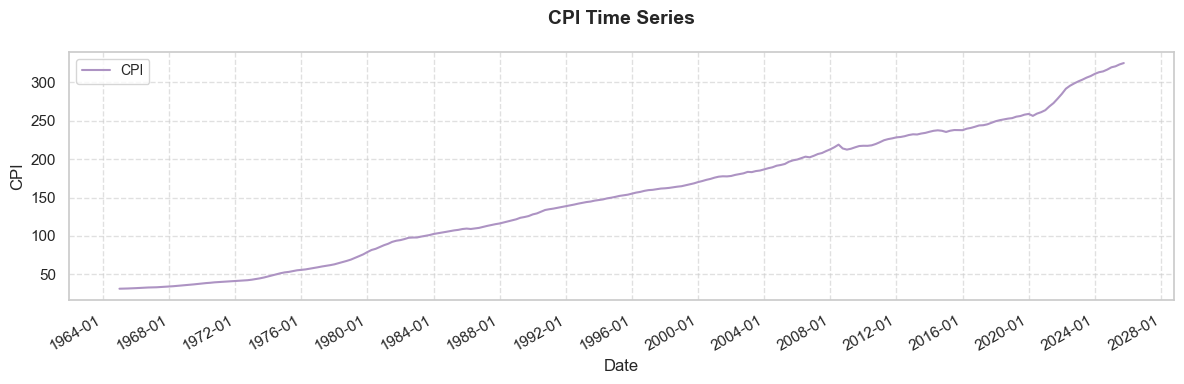

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0     CPI       1.546793  0.997689       False
Differenced Time Series df:
                    CPI  CPI_diff
date                            
1965-01-01   31.290000       NaN
1965-04-01   31.490000  0.200000
1965-07-01   31.583333  0.093333
1965-10-01   31.750000  0.166667
1966-01-01   32.046667  0.296667
...                ...       ...
2024-10-01  316.538667  2.356000
2025-01-01  319.492000  2.953333
2025-04-01  320.800333  1.308333
2025-07-01  323.288000  2.487667
2025-10-01  325.031000  1.743000

[244 rows x 2 columns]
ADF test results:
     Feature  ADF Statistic   p-value  Stationary
0  CPI_diff      -3.902242  0.002018        True


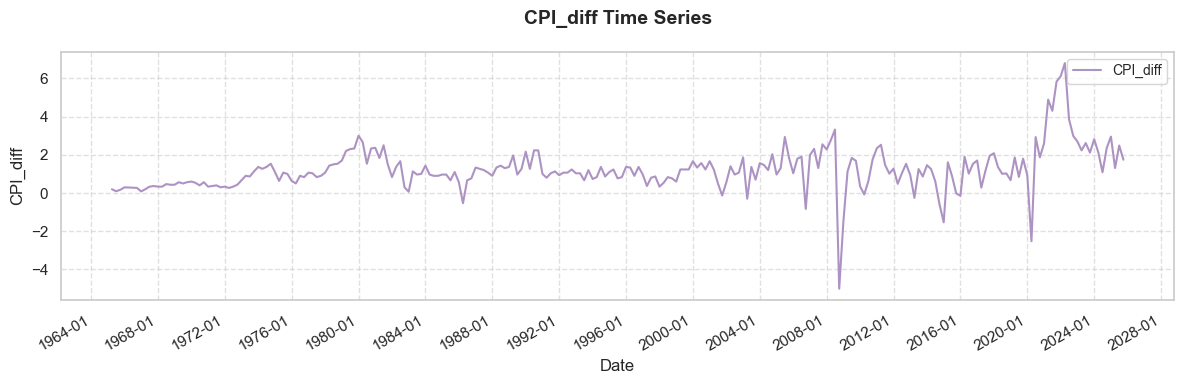

The Time Series is now stationary, after 1 differencing


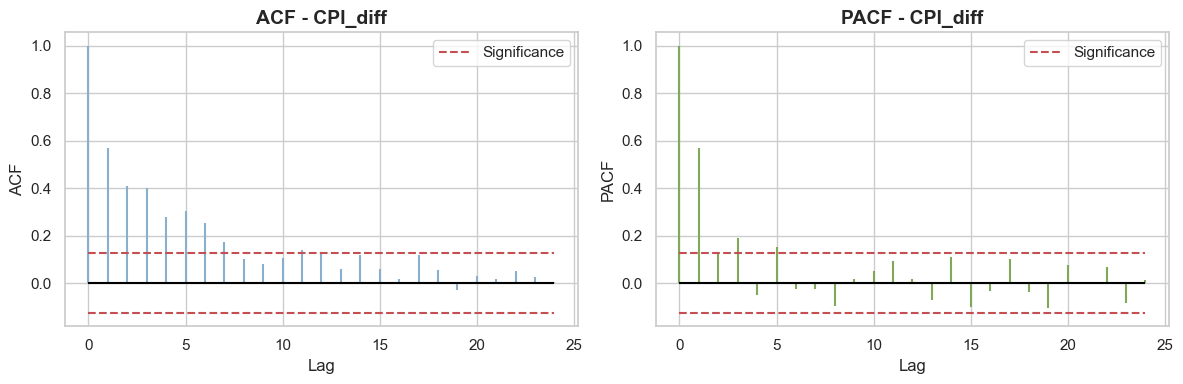

,CPI,CPI_diff
date,,
1965-01-01,31.290000,NaN
1965-04-01,31.490000,0.200000
1965-07-01,31.583333,0.093333
1965-10-01,31.750000,0.166667
1966-01-01,32.046667,0.296667


In [23]:
final_cpi = time_series_analysis_main(cpi_df, date_column_name='observation_date', column_name='CPI', lags=24)
final_cpi.head()

#### 4. **Industrial Production Total Index**

In [24]:
indpro_df = pd.read_csv('../datasets/INDPRO.csv')
indpro_df.head()

,observation_date,INDPRO
0,1965-01-01,30.3204
1,1965-02-01,30.5089
2,1965-03-01,30.9128
3,1965-04-01,31.0474
4,1965-05-01,31.2898


Dataset Information:
                     dtype  missing  n_unique      mean        std      min  \
observation_date   object        0       731       NaN        NaN      NaN   
INDPRO            float64        0       730  72.36045  24.290359  30.3204   

                       max  
observation_date       NaN  
INDPRO            104.1004  
Time Series Dataset:
              INDPRO
date               
1965-01-01  30.3204
1965-02-01  30.5089
1965-03-01  30.9128
1965-04-01  31.0474
1965-05-01  31.2898
INDPRO Time Series frequency changed from MS to QS-OCT
Aggregated dataset:
                INDPRO
date                 
1965-01-01  30.580700
1965-04-01  31.289767
1965-07-01  31.945033
1965-10-01  32.591267
1966-01-01  33.524800



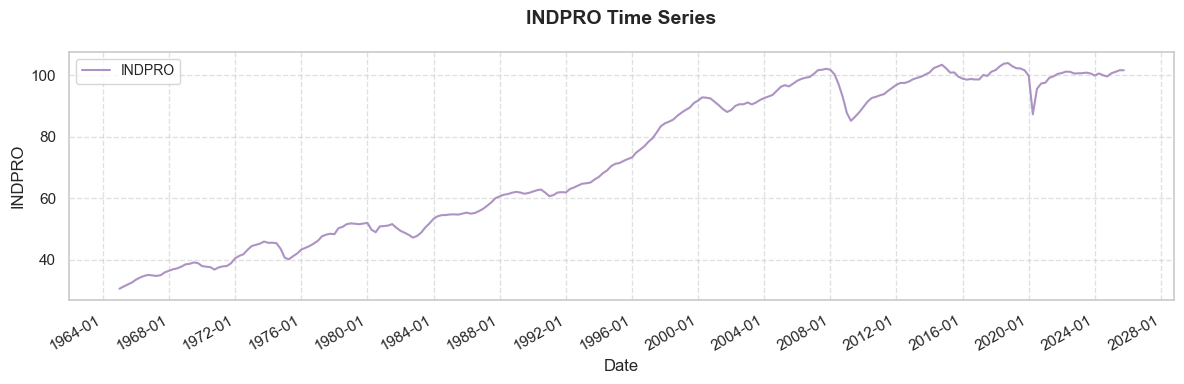

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0  INDPRO      -1.225042  0.662732       False
Differenced Time Series df:
                 INDPRO  INDPRO_diff
date                               
1965-01-01   30.580700          NaN
1965-04-01   31.289767     0.709067
1965-07-01   31.945033     0.655267
1965-10-01   32.591267     0.646233
1966-01-01   33.524800     0.933533
...                ...          ...
2024-10-01   99.696433    -0.375233
2025-01-01  100.734800     1.038367
2025-04-01  101.190633     0.455833
2025-07-01  101.716200     0.525567
2025-10-01  101.704750    -0.011450

[244 rows x 2 columns]
ADF test results:
        Feature  ADF Statistic       p-value  Stationary
0  INDPRO_diff     -13.234862  9.423356e-25        True


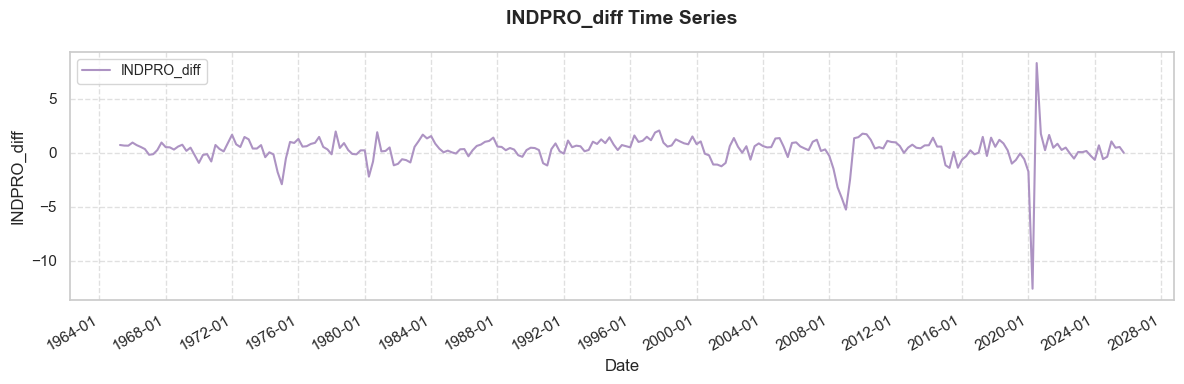

The Time Series is now stationary, after 1 differencing


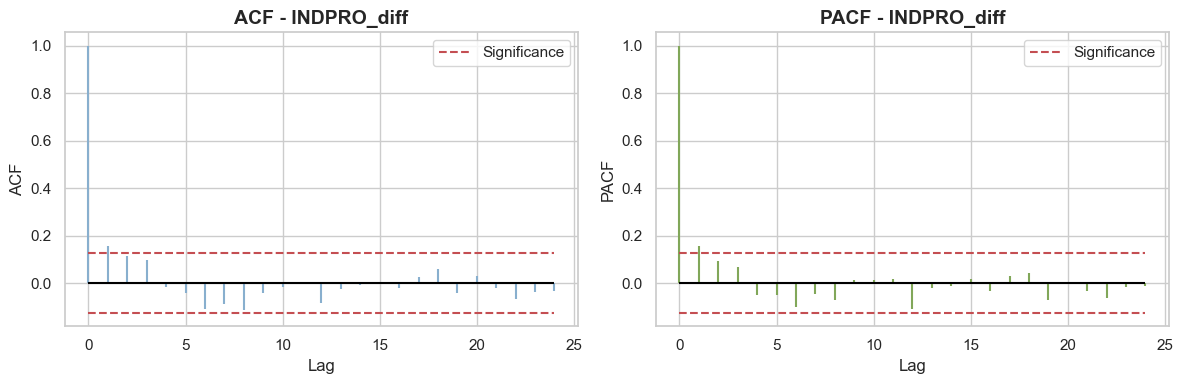

,INDPRO,INDPRO_diff
date,,
1965-01-01,30.580700,NaN
1965-04-01,31.289767,0.709067
1965-07-01,31.945033,0.655267
1965-10-01,32.591267,0.646233
1966-01-01,33.524800,0.933533


In [25]:
final_indpro = time_series_analysis_main(indpro_df, date_column_name='observation_date', column_name='INDPRO', lags=24)
final_indpro.head()

### **Financial Indicators Data**

In [26]:
financial_indicators= ['DFF', 'DGS10', 'DGS2', 'T10Y2Y', 'VIXCLS', 'DTB3']

#### 1. **Federal Funds Effective Rate** (DFF)

In [27]:
dff_df = pd.read_csv('../datasets/DFF.csv')
dff_df.head()

,observation_date,DFF
0,1965-01-01,4.0
1,1965-01-02,4.0
2,1965-01-03,4.0
3,1965-01-04,4.0
4,1965-01-05,4.0


Dataset Information:
                     dtype  missing  n_unique      mean       std   min    max
observation_date   object        0     22275       NaN       NaN   NaN    NaN
DFF               float64        0      1557  4.945183  3.730818  0.04  22.36
Time Series Dataset:
             DFF
date           
1965-01-01  4.0
1965-01-02  4.0
1965-01-03  4.0
1965-01-04  4.0
1965-01-05  4.0
DFF Time Series frequency changed from D to QS-OCT
Aggregated dataset:
                  DFF
date                
1965-01-01  3.977222
1965-04-01  4.079451
1965-07-01  4.077500
1965-10-01  4.170761
1966-01-01  4.559000



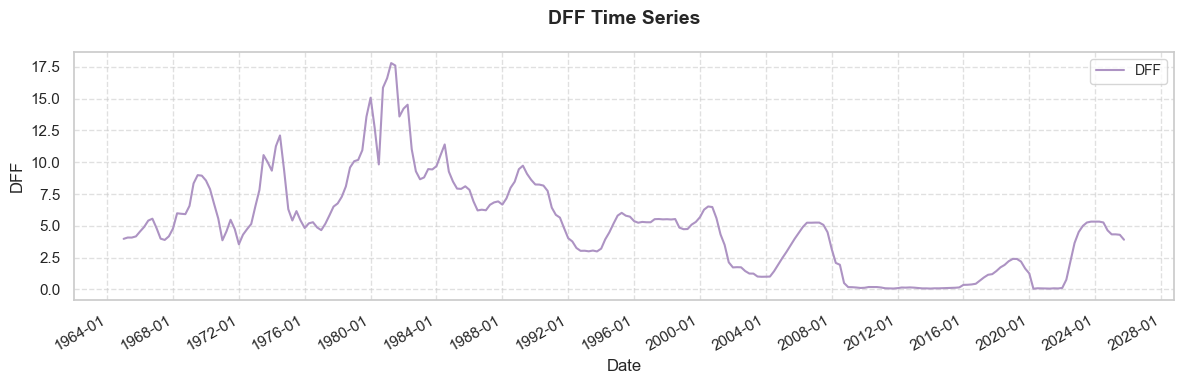

ADF test results:
   Feature  ADF Statistic  p-value  Stationary
0     DFF      -2.024744  0.27583       False
Differenced Time Series df:
                  DFF  DFF_diff
date                          
1965-01-01  3.977222       NaN
1965-04-01  4.079451  0.102228
1965-07-01  4.077500 -0.001951
1965-10-01  4.170761  0.093261
1966-01-01  4.559000  0.388239
...              ...       ...
2024-10-01  4.647935 -0.616848
2025-01-01  4.330000 -0.317935
2025-04-01  4.330000  0.000000
2025-07-01  4.295652 -0.034348
2025-10-01  3.909885 -0.385767

[244 rows x 2 columns]
ADF test results:
     Feature  ADF Statistic       p-value  Stationary
0  DFF_diff      -6.834843  1.853803e-09        True


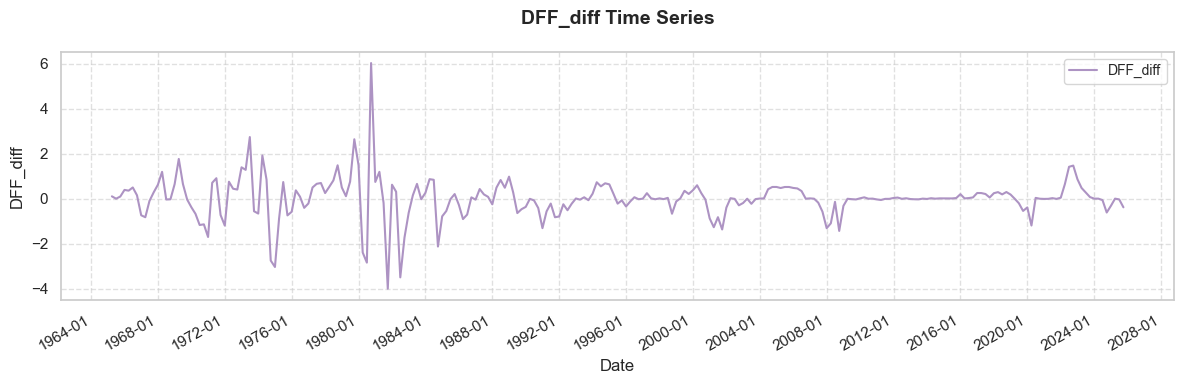

The Time Series is now stationary, after 1 differencing


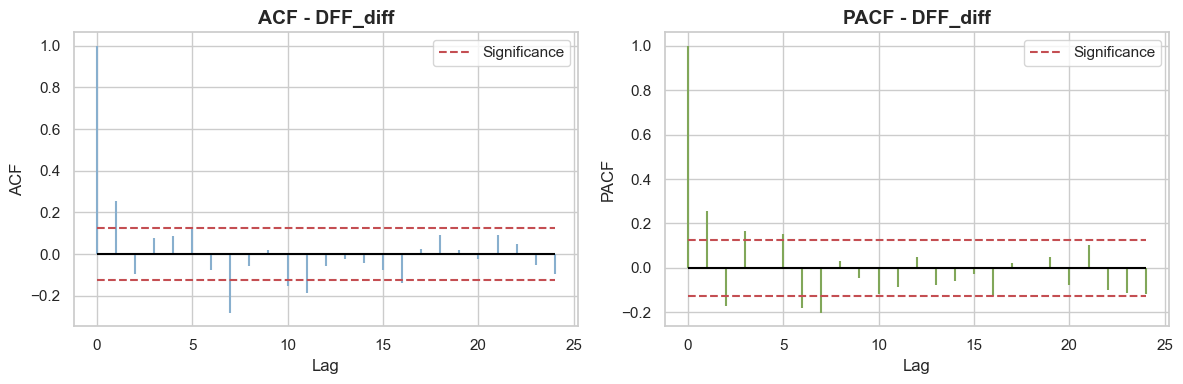

,DFF,DFF_diff
date,,
1965-01-01,3.977222,NaN
1965-04-01,4.079451,0.102228
1965-07-01,4.077500,-0.001951
1965-10-01,4.170761,0.093261
1966-01-01,4.559000,0.388239


In [28]:
final_dff = time_series_analysis_main(df=dff_df, date_column_name='observation_date', column_name='DFF',lags=24, aggregate_method='mean') 
final_dff.head()

#### 2. **Market Yield in U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis** (DGS10)

In [29]:
dgs10_df = pd.read_csv('../datasets/DGS10.csv')
dgs10_df.head()

,observation_date,DGS10
0,1965-01-04,4.2
1,1965-01-05,4.2
2,1965-01-06,4.2
3,1965-01-07,4.2
4,1965-01-08,4.2


Dataset Information:
                     dtype  missing  n_unique      mean       std   min    max
observation_date   object        0     15910       NaN       NaN   NaN    NaN
DGS10             float64      677      1394  5.907807  2.985558  0.52  15.84
Time Series Dataset:
             DGS10
date             
1965-01-04    4.2
1965-01-05    4.2
1965-01-06    4.2
1965-01-07    4.2
1965-01-08    4.2
DGS10 Time Series frequency changed from B to QS-OCT
Aggregated dataset:
                DGS10
date                
1965-01-01  4.203770
1965-04-01  4.209524
1965-07-01  4.249219
1965-10-01  4.476393
1966-01-01  4.773968



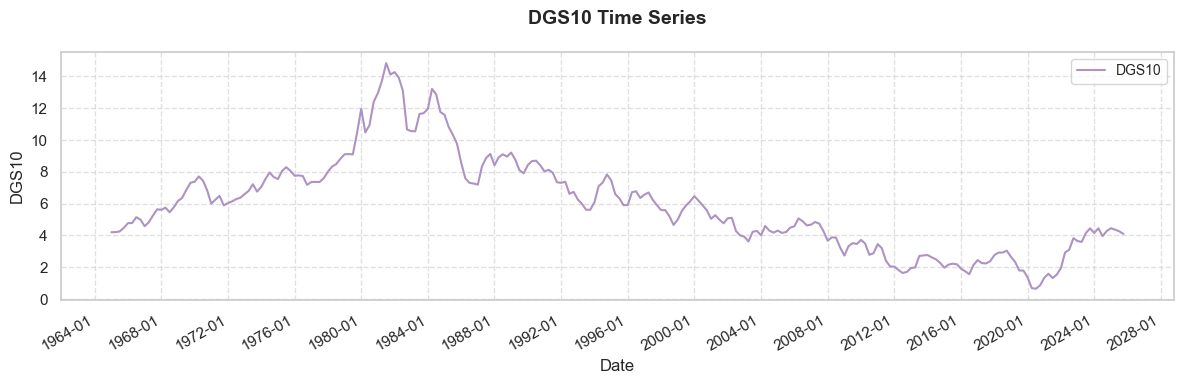

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0   DGS10      -1.142363  0.697886       False
Differenced Time Series df:
                DGS10  DGS10_diff
date                            
1965-01-01  4.203770         NaN
1965-04-01  4.209524    0.005753
1965-07-01  4.249219    0.039695
1965-10-01  4.476393    0.227175
1966-01-01  4.773968    0.297575
...              ...         ...
2024-10-01  4.275484    0.320796
2025-01-01  4.453607    0.178123
2025-04-01  4.361774   -0.091832
2025-07-01  4.261094   -0.100680
2025-10-01  4.097627   -0.163467

[244 rows x 2 columns]
ADF test results:
       Feature  ADF Statistic       p-value  Stationary
0  DGS10_diff      -6.942627  1.015890e-09        True


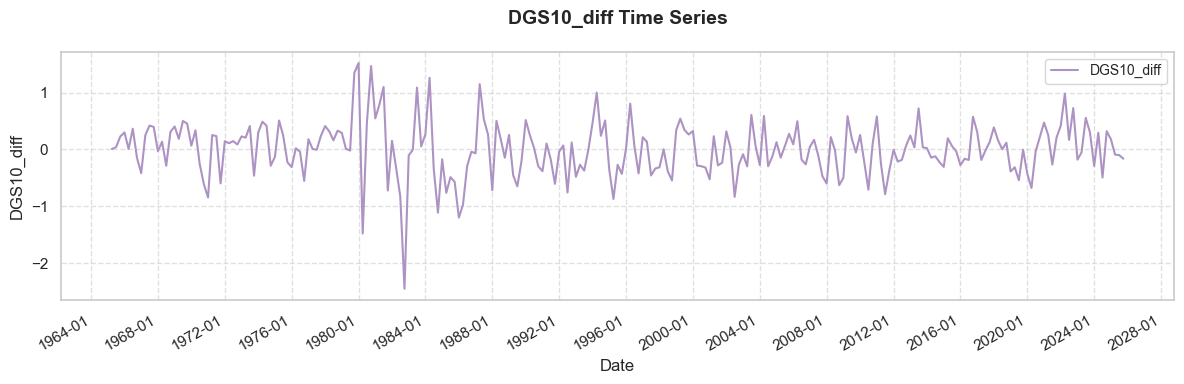

The Time Series is now stationary, after 1 differencing


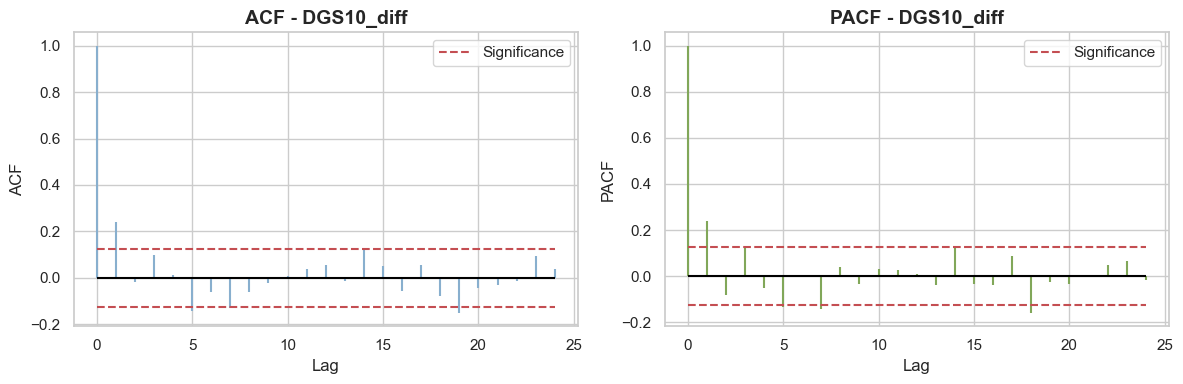

,DGS10,DGS10_diff
date,,
1965-01-01,4.203770,NaN
1965-04-01,4.209524,0.005753
1965-07-01,4.249219,0.039695
1965-10-01,4.476393,0.227175
1966-01-01,4.773968,0.297575


In [30]:
final_dgs10 = time_series_analysis_main(df=dgs10_df, date_column_name='observation_date', column_name='DGS10', lags=24, aggregate_method='mean')
final_dgs10.head()

#### 3. **Market Yield in U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis** (DGS2)

In [31]:
dgs2_df = pd.read_csv('../datasets/DGS2.csv')
dgs2_df.head()

,observation_date,DGS2
0,1976-06-01,7.26
1,1976-06-02,7.23
2,1976-06-03,7.22
3,1976-06-04,7.12
4,1976-06-07,7.09


Dataset Information:
                     dtype  missing  n_unique     mean       std   min    max
observation_date   object        0     12934      NaN       NaN   NaN    NaN
DGS2              float64      545      1491  4.96746  3.676636  0.09  16.95
Time Series Dataset:
             DGS2
date            
1976-06-01  7.26
1976-06-02  7.23
1976-06-03  7.22
1976-06-04  7.12
1976-06-07  7.09
DGS2 Time Series frequency changed from B to QS-OCT
Aggregated dataset:
                 DGS2
date                
1976-04-01  7.060000
1976-07-01  6.632500
1976-10-01  5.710820
1977-01-01  6.024762
1977-04-01  6.117778



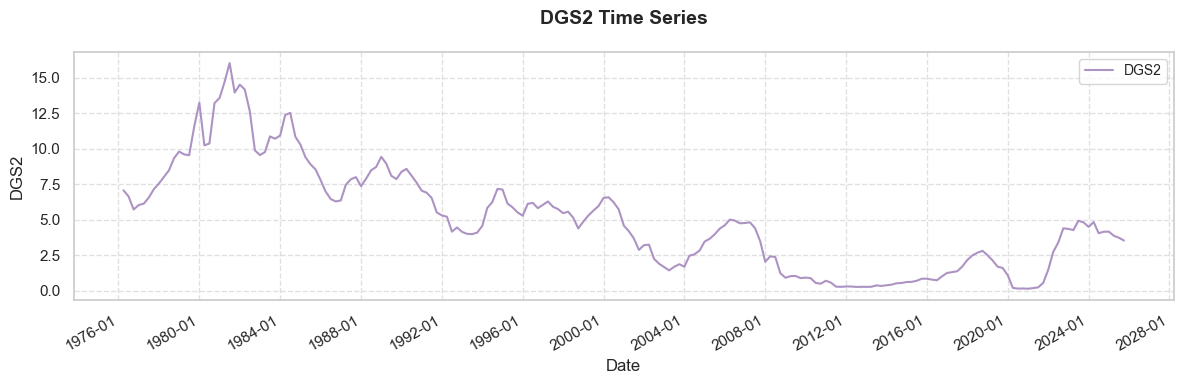

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0    DGS2      -1.365624  0.598641       False
Differenced Time Series df:
                 DGS2  DGS2_diff
date                           
1976-04-01  7.060000        NaN
1976-07-01  6.632500  -0.427500
1976-10-01  5.710820  -0.921680
1977-01-01  6.024762   0.313942
1977-04-01  6.117778   0.093016
...              ...        ...
2024-10-01  4.145484   0.104859
2025-01-01  4.148689   0.003205
2025-04-01  3.861774  -0.286914
2025-07-01  3.720781  -0.140993
2025-10-01  3.525763  -0.195019

[199 rows x 2 columns]
ADF test results:
      Feature  ADF Statistic       p-value  Stationary
0  DGS2_diff      -6.292821  3.564747e-08        True


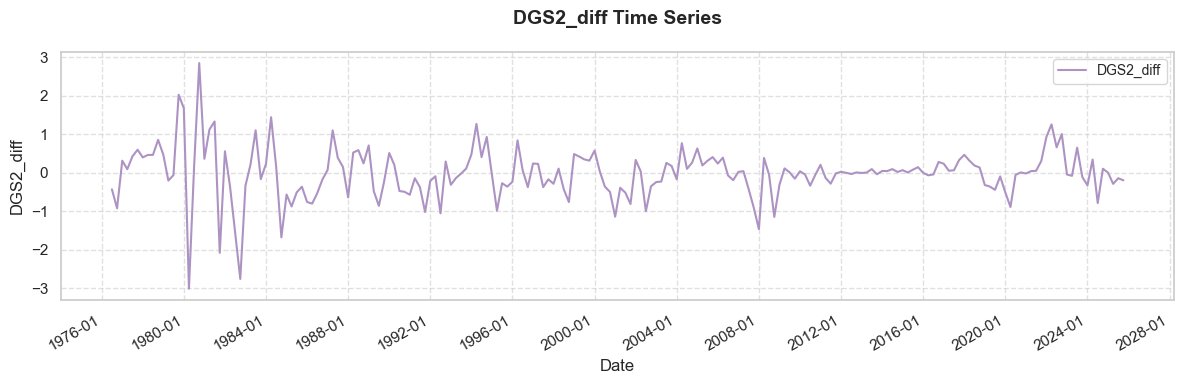

The Time Series is now stationary, after 1 differencing


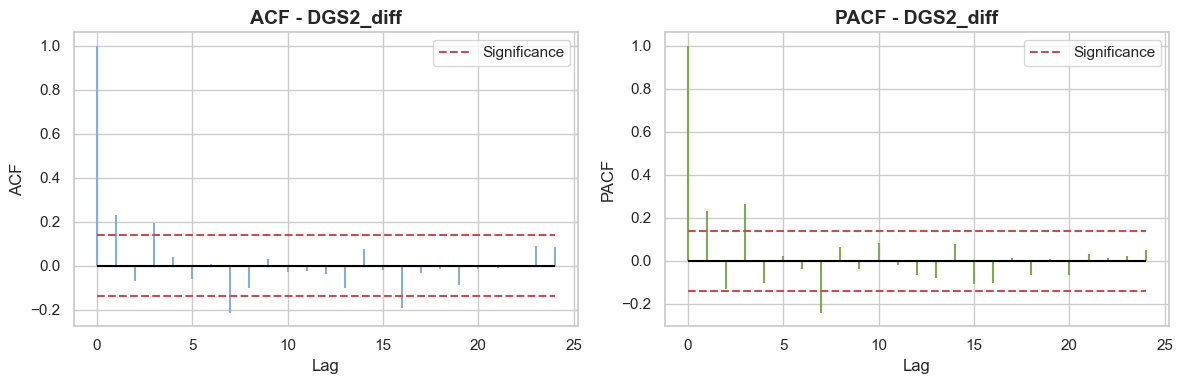

,DGS2,DGS2_diff
date,,
1976-04-01,7.060000,NaN
1976-07-01,6.632500,-0.427500
1976-10-01,5.710820,-0.921680
1977-01-01,6.024762,0.313942
1977-04-01,6.117778,0.093016


In [32]:
final_dgs2 = time_series_analysis_main(df=dgs2_df, date_column_name='observation_date', column_name='DGS2', lags=24, aggregate_method='mean')
final_dgs2.head()

#### 4. **10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant** (T10Y2Y)

In [33]:
t10y2y_df = pd.read_csv('../datasets/T10Y2Y.csv')
t10y2y_df.head()

,observation_date,T10Y2Y
0,1976-06-01,0.68
1,1976-06-02,0.71
2,1976-06-03,0.70
3,1976-06-04,0.77
4,1976-06-07,0.79


Dataset Information:
                     dtype  missing  n_unique      mean       std   min   max
observation_date   object        0     12935       NaN       NaN   NaN   NaN
T10Y2Y            float64      545       474  0.850043  0.918029 -2.41  2.91
Time Series Dataset:
             T10Y2Y
date              
1976-06-01    0.68
1976-06-02    0.71
1976-06-03    0.70
1976-06-04    0.77
1976-06-07    0.79
T10Y2Y Time Series frequency changed from B to QS-OCT
Aggregated dataset:
               T10Y2Y
date                
1976-04-01  0.801364
1976-07-01  1.099687
1976-10-01  1.467377
1977-01-01  1.332222
1977-04-01  1.248254



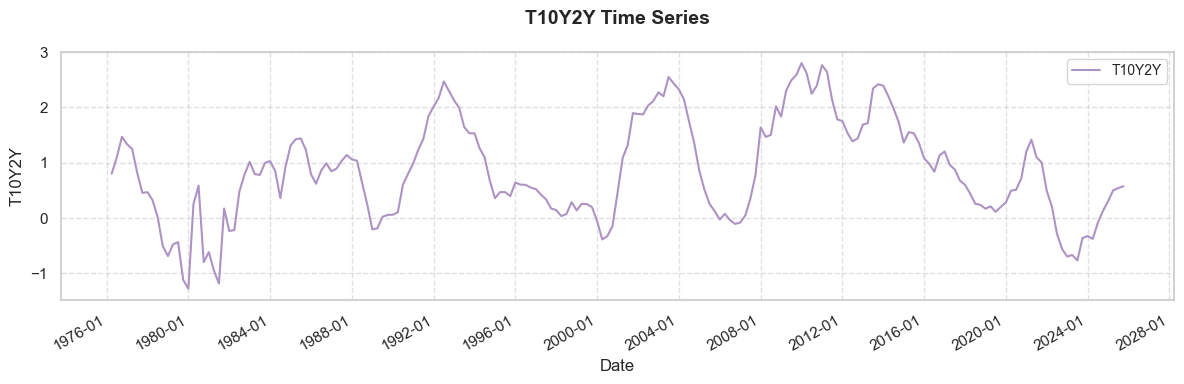

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0  T10Y2Y      -4.083362  0.001032        True


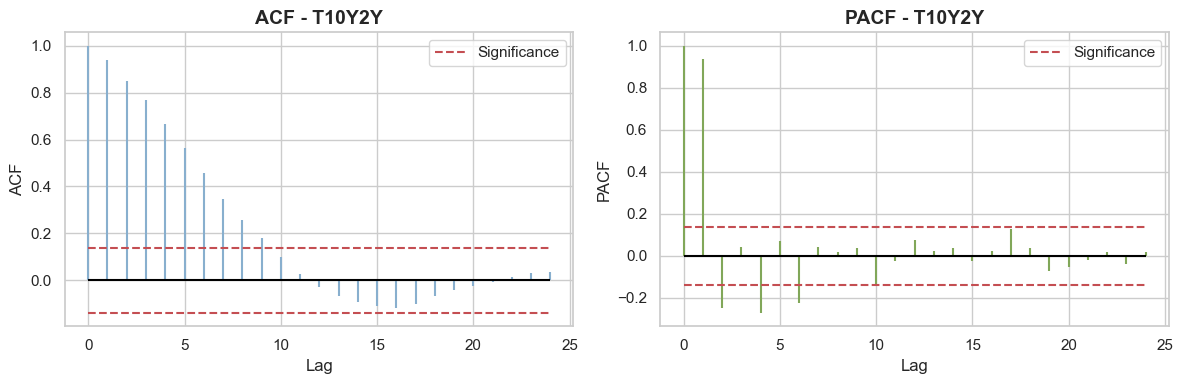

,T10Y2Y
date,
1976-04-01,0.801364
1976-07-01,1.099687
1976-10-01,1.467377
1977-01-01,1.332222
1977-04-01,1.248254


In [34]:
final_t10y2y = time_series_analysis_main(df=t10y2y_df, date_column_name='observation_date', column_name='T10Y2Y', lags=24, aggregate_method='mean')
final_t10y2y.head()

#### 5. **CBOE Volatility Index** (VIXCLS)

In [35]:
vix_df = pd.read_csv('../datasets/VIXCLS.csv')
vix_df.head()

,observation_date,VIXCLS
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


In [36]:
vix_df = vix_df.rename(columns={'VIXCLS': 'VIX'})

Dataset Information:
                     dtype  missing  n_unique       mean       std   min    max
observation_date   object        0      9389        NaN       NaN   NaN    NaN
VIX               float64      300      2522  19.450858  7.780301  9.14  82.69
Time Series Dataset:
               VIX
date             
1990-01-02  17.24
1990-01-03  18.19
1990-01-04  19.22
1990-01-05  20.11
1990-01-08  20.26
VIX Time Series frequency changed from B to QS-OCT
Aggregated dataset:
                   VIX
date                 
1990-01-01  22.174603
1990-04-01  18.722063
1990-07-01  25.195556
1990-10-01  26.113281
1991-01-01  22.515833



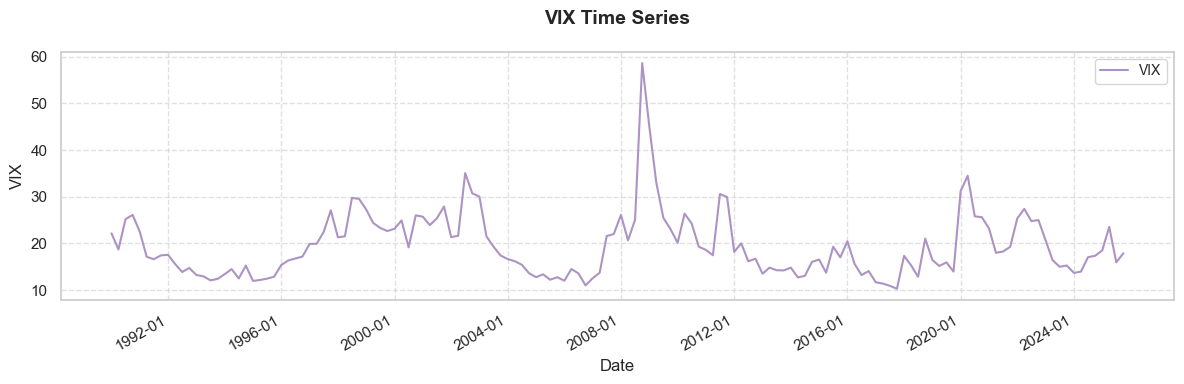

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0     VIX      -4.703398  0.000083        True


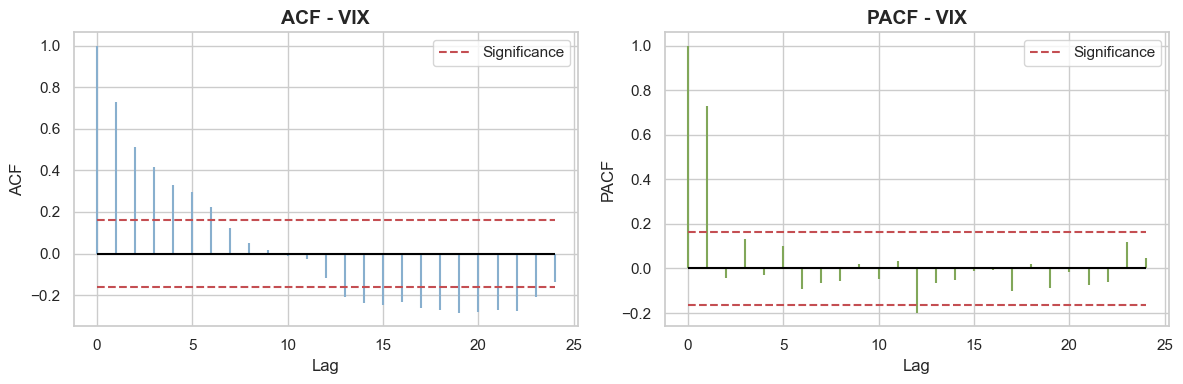

,VIX
date,
1990-01-01,22.174603
1990-04-01,18.722063
1990-07-01,25.195556
1990-10-01,26.113281
1991-01-01,22.515833


In [37]:
final_vix = time_series_analysis_main(df=vix_df, date_column_name='observation_date', column_name='VIX', lags=24, aggregate_method='mean')
final_vix.head()

#### 6. **3-Month Treasury Bill Secondary Market Rate, Discount Basis** (DTB3)

In [38]:
dtb3_df = pd.read_csv('../datasets/DTB3.csv')
dtb3_df.head()

,observation_date,DTB3
0,1965-01-04,3.81
1,1965-01-05,3.80
2,1965-01-06,3.82
3,1965-01-07,3.80
4,1965-01-08,3.78


Dataset Information:
                     dtype  missing  n_unique      mean       std   min    max
observation_date   object        0     15910       NaN       NaN   NaN    NaN
DTB3              float64      677      1401  4.486041  3.216214 -0.05  17.14
Time Series Dataset:
             DTB3
date            
1965-01-04  3.81
1965-01-05  3.80
1965-01-06  3.82
1965-01-07  3.80
1965-01-08  3.78
DTB3 Time Series frequency changed from B to QS-OCT
Aggregated dataset:
                 DTB3
date                
1965-01-01  3.889672
1965-04-01  3.872381
1965-07-01  3.866875
1965-10-01  4.173934
1966-01-01  4.606190



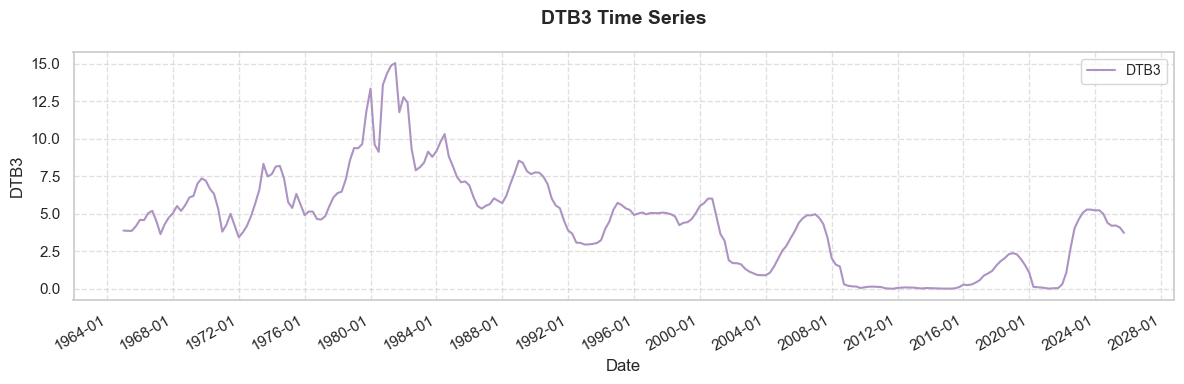

ADF test results:
   Feature  ADF Statistic   p-value  Stationary
0    DTB3      -1.558547  0.504376       False
Differenced Time Series df:
                 DTB3  DTB3_diff
date                           
1965-01-01  3.889672        NaN
1965-04-01  3.872381  -0.017291
1965-07-01  3.866875  -0.005506
1965-10-01  4.173934   0.307059
1966-01-01  4.606190   0.432256
...              ...        ...
2024-10-01  4.400968  -0.597001
2025-01-01  4.208197  -0.192771
2025-04-01  4.229839   0.021642
2025-07-01  4.098750  -0.131089
2025-10-01  3.734068  -0.364682

[244 rows x 2 columns]
ADF test results:
      Feature  ADF Statistic       p-value  Stationary
0  DTB3_diff      -6.079314  1.101965e-07        True


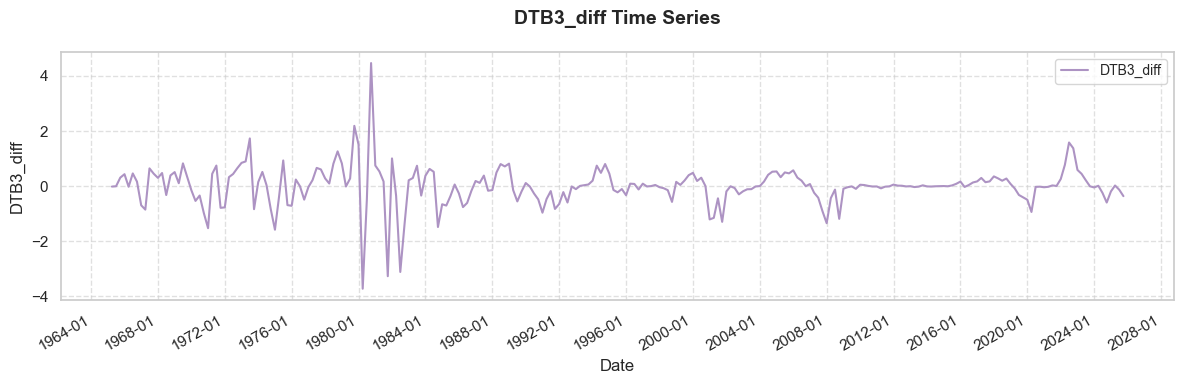

The Time Series is now stationary, after 1 differencing


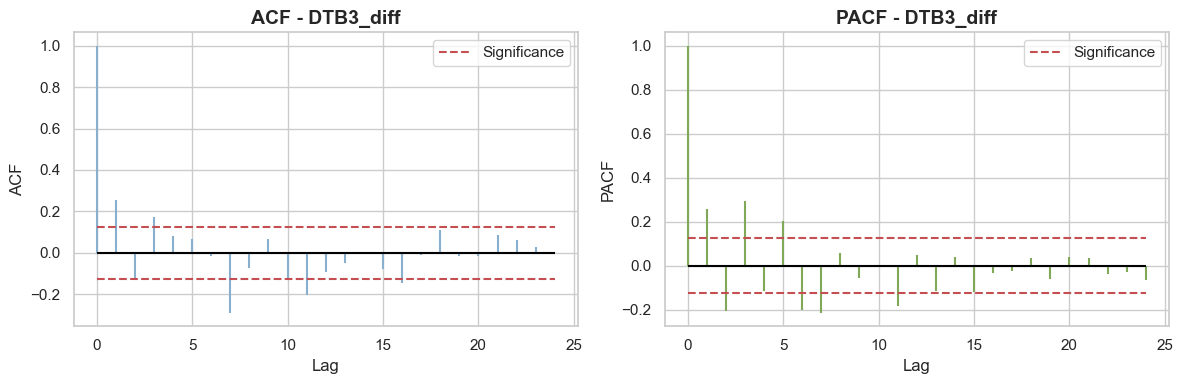

,DTB3,DTB3_diff
date,,
1965-01-01,3.889672,NaN
1965-04-01,3.872381,-0.017291
1965-07-01,3.866875,-0.005506
1965-10-01,4.173934,0.307059
1966-01-01,4.606190,0.432256


In [39]:
final_dtb3 = time_series_analysis_main(df=dtb3_df, date_column_name='observation_date', column_name='DTB3', lags=24, aggregate_method='mean')
final_dtb3.head()

#### 7. **News Sentiment Data** 

In [40]:
news_sentiment_df = pd.read_excel('../datasets/news_sentiment_data.xlsx', sheet_name='Data', skiprows=1, header=None, names=['observation_date', 'NEWS_SENTIMENT'])
news_sentiment_df.head()

,observation_date,NEWS_SENTIMENT
0,1980-01-01,-0.037927
1,1980-01-02,-0.106654
2,1980-01-03,-0.089502
3,1980-01-05,-0.067226
4,1980-01-06,-0.089110


Dataset Information:
                            dtype  missing  n_unique      mean       std  \
observation_date  datetime64[ns]        0     16780       NaN       NaN   
NEWS_SENTIMENT           float64        0     16780  0.009034  0.181423   

                       min       max  
observation_date       NaN       NaN  
NEWS_SENTIMENT   -0.714208  0.454221  
Time Series Dataset:
             NEWS_SENTIMENT
date                      
1980-01-01       -0.037927
1980-01-02       -0.106654
1980-01-03       -0.089502
1980-01-05       -0.067226
1980-01-06       -0.089110
NEWS_SENTIMENT Time Series frequency changed from None to QS-OCT
Aggregated dataset:
             NEWS_SENTIMENT
date                      
1980-01-01       -0.247040
1980-04-01       -0.585667
1980-07-01       -0.285839
1980-10-01       -0.085084
1981-01-01       -0.008757



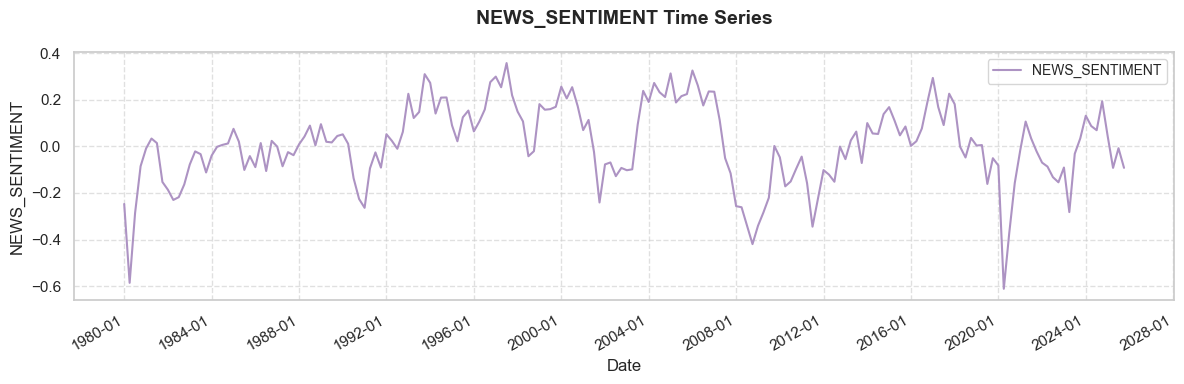

ADF test results:
           Feature  ADF Statistic   p-value  Stationary
0  NEWS_SENTIMENT      -4.308538  0.000429        True


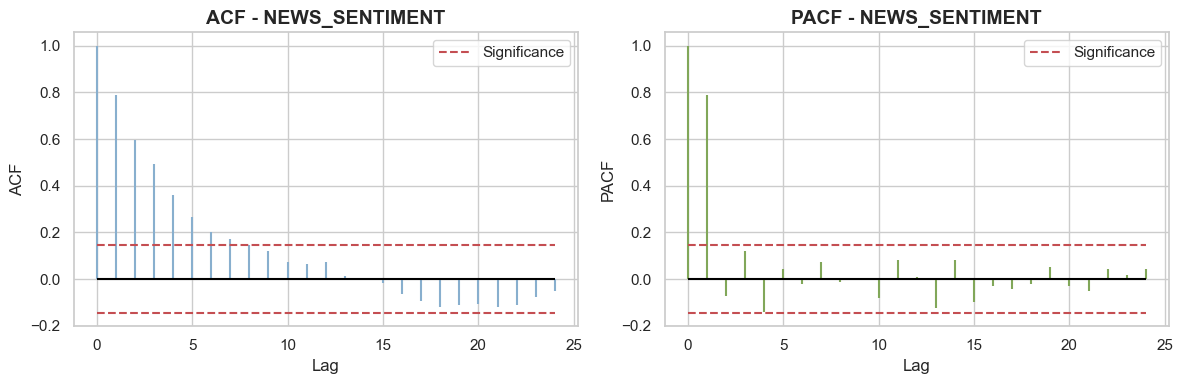

,NEWS_SENTIMENT
date,
1980-01-01,-0.247040
1980-04-01,-0.585667
1980-07-01,-0.285839
1980-10-01,-0.085084
1981-01-01,-0.008757


In [41]:
final_news_sentiment = time_series_analysis_main(df=news_sentiment_df, date_column_name='observation_date', column_name='NEWS_SENTIMENT', lags=24, aggregate_method='mean')
final_news_sentiment.head()

### **Dataset Generation - Merging all time series**

In [42]:
list_all_df= [final_gdp, final_unrate, final_cpi, final_indpro, final_dff, final_dgs10, final_dgs2, final_t10y2y, final_vix, final_dtb3, final_news_sentiment]
list_all_df_names = ['GDP', 'UNRATE', 'CPI', 'INDPRO', 'DFF', 'DGS10', 'DGS2', 'T10Y2Y', 'VIX', 'DTB3', 'NEWS_SENTIMENT']


merged_df = merge_data_with_label(labels_df=labels_df, list_all_df=list_all_df, list_all_df_names=list_all_df_names)
merged_df

,label,GDP,GDP_diff,UNRATE,CPI,CPI_diff,INDPRO,INDPRO_diff,DFF,DFF_diff,DGS10,DGS10_diff,DGS2,DGS2_diff,T10Y2Y,VIX,DTB3,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,,,,,,,,
1967-10-01,0,881.439,16.206,3.900000,33.866667,0.366667,35.926333,0.936267,4.172826,0.280978,5.641803,0.394819,NaN,NaN,NaN,NaN,4.748033,0.451049,NaN
1968-01-01,0,909.387,27.948,3.733333,34.200000,0.333333,36.439167,0.512833,4.792637,0.619811,5.610968,-0.030836,NaN,NaN,NaN,NaN,5.048226,0.300193,NaN
1968-04-01,0,934.344,24.957,3.566667,34.533333,0.333333,36.930433,0.491267,5.984286,1.191648,5.746129,0.135161,NaN,NaN,NaN,NaN,5.523226,0.475000,NaN
1968-07-01,0,950.825,16.481,3.533333,35.000000,0.466667,37.216967,0.286533,5.946522,-0.037764,5.458594,-0.287535,NaN,NaN,NaN,NaN,5.198125,-0.325101,NaN
1968-10-01,0,968.030,17.205,3.400000,35.433333,0.433333,37.782167,0.565200,5.918152,-0.028370,5.767742,0.309148,NaN,NaN,NaN,NaN,5.585323,0.387198,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0,29147.044,438.883,4.000000,313.095667,2.121333,100.666800,0.678533,5.330000,0.000000,4.448730,0.292337,4.826190,0.343895,-0.377460,13.980308,5.246190,0.012256,0.087528
2024-07-01,0,29511.664,364.620,4.166667,314.182667,1.087000,100.071667,-0.595133,5.264783,-0.065217,3.954687,-0.494043,4.040625,-0.785565,-0.085938,17.066667,4.997969,-0.248222,0.069566
2024-10-01,0,29825.182,313.518,4.133333,316.538667,2.356000,99.696433,-0.375233,4.647935,-0.616848,4.275484,0.320796,4.145484,0.104859,0.130000,17.363231,4.400968,-0.597001,0.193711


In [43]:
merged_df = merged_df.dropna()
print("Start date:", merged_df.index.min())
print("End date:", merged_df.index.max())
merged_df

Start date: 1990-01-01 00:00:00
End date: 2025-04-01 00:00:00


,label,GDP,GDP_diff,UNRATE,CPI,CPI_diff,INDPRO,INDPRO_diff,DFF,DFF_diff,DGS10,DGS10_diff,DGS2,DGS2_diff,T10Y2Y,VIX,DTB3,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,,,,,,,,
1990-01-01,1,5872.701,125.464,5.300000,128.033333,2.166667,62.206167,0.458233,8.248000,-0.366457,8.423871,0.516774,8.364839,0.513065,0.059032,22.174603,7.763548,0.112097,0.051820
1990-04-01,1,5960.028,87.327,5.333333,129.300000,1.266667,62.633300,0.427133,8.239341,-0.008659,8.674127,0.250256,8.571111,0.206272,0.103016,18.722063,7.746667,-0.016882,0.011166
1990-07-01,1,6015.116,55.088,5.700000,131.533333,2.233333,62.876067,0.242767,8.160217,-0.079123,8.701270,0.027143,8.098730,-0.472381,0.602540,25.195556,7.477143,-0.269524,-0.136543
1990-10-01,1,6004.733,-10.383,6.133333,133.766667,2.233333,61.902800,-0.973267,7.743370,-0.416848,8.405968,-0.295302,7.606129,-0.492601,0.800161,26.113281,6.994839,-0.482304,-0.225727
1991-01-01,1,6035.178,30.445,6.600000,134.766667,1.000000,60.717967,-1.184833,6.430444,-1.312925,8.022833,-0.383134,7.036000,-0.570129,0.987167,22.515833,6.028667,-0.966172,-0.263631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0,29147.044,438.883,4.000000,313.095667,2.121333,100.666800,0.678533,5.330000,0.000000,4.448730,0.292337,4.826190,0.343895,-0.377460,13.980308,5.246190,0.012256,0.087528
2024-07-01,0,29511.664,364.620,4.166667,314.182667,1.087000,100.071667,-0.595133,5.264783,-0.065217,3.954687,-0.494043,4.040625,-0.785565,-0.085938,17.066667,4.997969,-0.248222,0.069566
2024-10-01,0,29825.182,313.518,4.133333,316.538667,2.356000,99.696433,-0.375233,4.647935,-0.616848,4.275484,0.320796,4.145484,0.104859,0.130000,17.363231,4.400968,-0.597001,0.193711


In [44]:
print(merged_df.columns)

Index(['label', 'GDP', 'GDP_diff', 'UNRATE', 'CPI', 'CPI_diff', 'INDPRO',
       'INDPRO_diff', 'DFF', 'DFF_diff', 'DGS10', 'DGS10_diff', 'DGS2',
       'DGS2_diff', 'T10Y2Y', 'VIX', 'DTB3', 'DTB3_diff', 'NEWS_SENTIMENT'],
      dtype='object')


In [45]:
columns_to_remove = ['GDP', 'CPI', 'INDPRO', 'DFF', 'DGS10', 'DGS2', 'DTB3']
for col in merged_df.columns: 
    if col in columns_to_remove:
        merged_df = merged_df.drop(columns=col)

In [46]:
merged_df.head()

,label,GDP_diff,UNRATE,CPI_diff,INDPRO_diff,DFF_diff,DGS10_diff,DGS2_diff,T10Y2Y,VIX,DTB3_diff,NEWS_SENTIMENT
date,,,,,,,,,,,,
1990-01-01,1,125.464,5.300000,2.166667,0.458233,-0.366457,0.516774,0.513065,0.059032,22.174603,0.112097,0.051820
1990-04-01,1,87.327,5.333333,1.266667,0.427133,-0.008659,0.250256,0.206272,0.103016,18.722063,-0.016882,0.011166
1990-07-01,1,55.088,5.700000,2.233333,0.242767,-0.079123,0.027143,-0.472381,0.602540,25.195556,-0.269524,-0.136543
1990-10-01,1,-10.383,6.133333,2.233333,-0.973267,-0.416848,-0.295302,-0.492601,0.800161,26.113281,-0.482304,-0.225727
1991-01-01,1,30.445,6.600000,1.000000,-1.184833,-1.312925,-0.383134,-0.570129,0.987167,22.515833,-0.966172,-0.263631


In [49]:
merged_df.to_csv('../datasets/data_merged.csv', index=True)